<a href="https://colab.research.google.com/github/ciencias-da-terra-python-1-2022-1/atividade-04/blob/main/ctp1_2022_atividade_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="left"> Uso de dados para Ciências da Terra e Ambiental em Python 1 (CTP1) </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Logo_UFF_%28blue%29.svg/320px-Logo_UFF_%28blue%29.svg.png" alt="drawing" style="width:200px;"/>
<img src="https://www.cnrd.info/files/2016/01/logo_geociencias_uff-250x87.jpg" alt="drawing" style="width:200px;"/>
<img src="https://ppgdot.sipos.com.br/interface/images/logo-programa-colorido.png" alt="drawing" width="200";"/>

Professor: Leonardo Miquelutti

Material provided by EarthLab under [CC BY-NC-ND 4.0](https://www.earthdatascience.org/license/)
[Copyright (c) Earth Lab](https://www.earthdatascience.org)

# Atividade Prática 04 - Análise de Dados Vetoriais



Before submitting this assignment, be sure to restart the kernel and run all cells. To do this, pull down the Kernel drop down at the top of this notebook. Then select **restart and run all**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below.

---

As you complete this assignment, be sure to:

* Keep comments concise and strategic. Don't comment every line!
* Organize your code in a way that makes it easy to follow.
* Place ONLY the code needed to create a plot in the plot cells. Place additional processing code ABOVE that cell (in a separate code cell).
* Only include the package imports, code, packages, and outputs that are CRUCIAL to your homework assignment.

## Assignment Background

In this assignment, you will explore an area in California called the [San Joaquin Experimental Range](https://www.neonscience.org/field-sites/field-sites-map/SJER) known by the acronym SJER on the NEON Website. You will look at data from this area next week more closely next week when we discuss uncertainty and lidar data.

The data that you will use for this week is available [here](https://ndownloader.figshare.com/files/12459464).

To begin, add all of the needed package imports and set your working directory in the cells below.


## Plot 1 - Roads Map and Legend

The NEON **SJER** field site is located in California. Your first task is to explore the area by creating a map of California roads that has symbology that represents different road types.

### Open the roads layer, clip the data and create a geodataframe

1. Open the `california/madera-county-roads/tl_2013_06039_roads.shp` file located in your `spatial-vector-lidar` data download using GeoPandas.
2. Crop the geodataframe using the SJER boundary (`california/neon-sjer-site/vector_data/SJER_crop.shp`) layer. Name your clipped roads object: `sjer_roads_cl`.
3. Open the SJER plot locations data (`california/neon-sjer-site/vector_data/SJER_plot_centroids.shp`). Name your SJER plot locations object: `sjer_plots`.
4. Create a map that shows the cropped madera roads layer, SJER plot locations and the SJER boundary (`california/neon-sjer-site/vector_data/SJER_crop.shp`).

### Important Notes:

1. Plot the roads so different **road types** are represented using unique symbology using the `RTTYP` attribute.
2. Add the plot locations to your map. Color each location according to the attribute **plot type** using unique symbology for each `plot_type` in the data.
3. Add a **title** to your plot.
4. Be sure that your plot legend is not covering your final map.
5. **IMPORTANT:** be sure that all of the data are within the same `EXTENT` and `crs` of the SJER boundary layer. This means that you  have to crop and reproject your data prior to plotting it!

### Warning to Ignore
**NOTE:** you can ignore the warning from pyproj: `'+init=<authority>:<code>' syntax is deprecated.`, which will be resolved by an update to GeoPandas in the next release.

In [1]:
# YOUR CODE HERE
# install necessary packages
!pip install geopandas
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 81.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 100.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#set a path
from google.colab import drive
drive.mount('/content/drive')

import os
import geopandas as gpd
import matplotlib.pyplot as plt
import urllib.request

# Plot data inline
plt.ion()

# Set working directory
os.chdir('/content')

Mounted at /content/drive


In [3]:
# PLOT 1 - Place only the code required to create a plot of your data here
# Additional processing code can go above this code cell

# Important: name your plots geodataframe: sjer_plots
# Important: name your clipped roads geodataframe: sjer_roads_cl

# YOUR CODE HERE

#open the  files
county_roads = gpd.read_file('/content/drive/MyDrive/python_1/spatial-vector-lidar/california/madera-county-roads/tl_2013_06039_roads.shp')
county_roads.head(5)

mask_limit = gpd.read_file('/content/drive/MyDrive/python_1/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_crop.shp')
mask_limit.head(5)

#open the locations data
sjer_plots =  gpd.read_file('/content/drive/MyDrive/python_1/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_plot_centroids.shp')
sjer_plots.head(5)

#clip the roads layer with the layer mask

#checking the crs

if (county_roads.crs == mask_limit.crs == sjer_plots.crs):
  print("Both layers are in the same crs!")
else:
   print("Both layers are not in the same crs!"),
   print('county_roads crs is', county_roads.crs)
   print('mask_limit crs is', mask_limit.crs)
   print('sjer_plots crs is',sjer_plots.crs)

Both layers are not in the same crs!
county_roads crs is EPSG:4269
mask_limit crs is EPSG:32611
sjer_plots crs is EPSG:32611


In [4]:
#convert county_roads for crs 32611
county_roads_wgs84 = county_roads.to_crs({"init": "epsg:32611"})
print('county_roads_wgs84 crs is', county_roads_wgs84.crs)

if (county_roads_wgs84.crs == mask_limit.crs == sjer_plots.crs):
  print("Both layers are in the same crs!")
else:
   print("Both layers are not in the same crs!"),
   print('county_roads crs is', county_roads_wgs84.crs)
   print('mask_limit crs is', mask_limit.crs)
   print('sjer_plots crs is',sjer_plots.crs)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


county_roads_wgs84 crs is +init=epsg:32611 +type=crs
Both layers are in the same crs!


<Axes: >

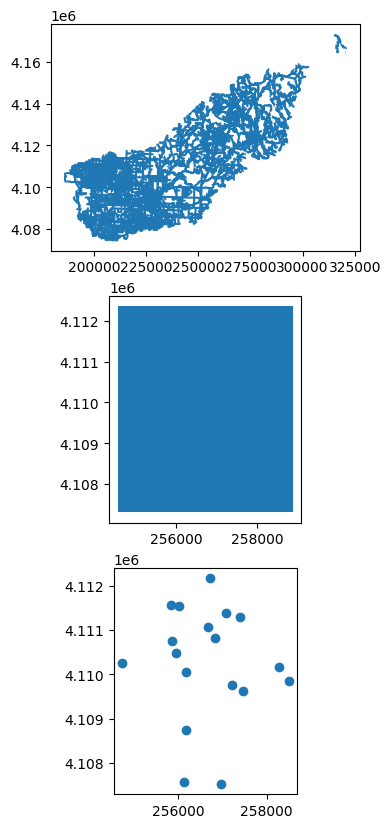

In [5]:
#view the layer's

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

county_roads_wgs84.plot(ax=ax1)

mask_limit.plot(ax=ax2)

sjer_plots.plot(ax=ax3)

['Unknown' 'M' 'S']


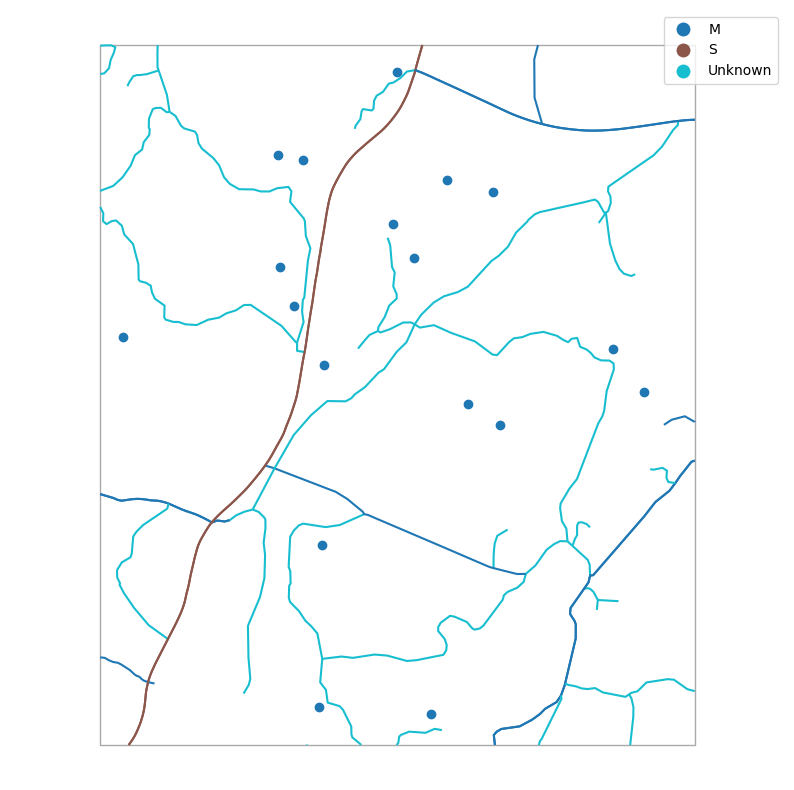

In [6]:
#cliping
sjer_roads_cl = gpd.clip(county_roads_wgs84, mask_limit)
sjer_roads_cl['RTTYP'].unique()
sjer_roads_cl["RTTYP"] = sjer_roads_cl["RTTYP"].fillna("Unknown")
print(sjer_roads_cl["RTTYP"].unique())
#plot
fig, ax = plt.subplots(figsize = (10,10))

mask_limit.plot(alpha=1,
                color="white",
                edgecolor="darkgray",
                ax=ax)

sjer_roads_cl.plot(ax=ax,
                   column="RTTYP",
                   legend=True)

sjer_plots.plot(ax=ax)

ax.set_axis_off()
plt.axis('equal')
plt.show()

['Unknown' 'M' 'S']


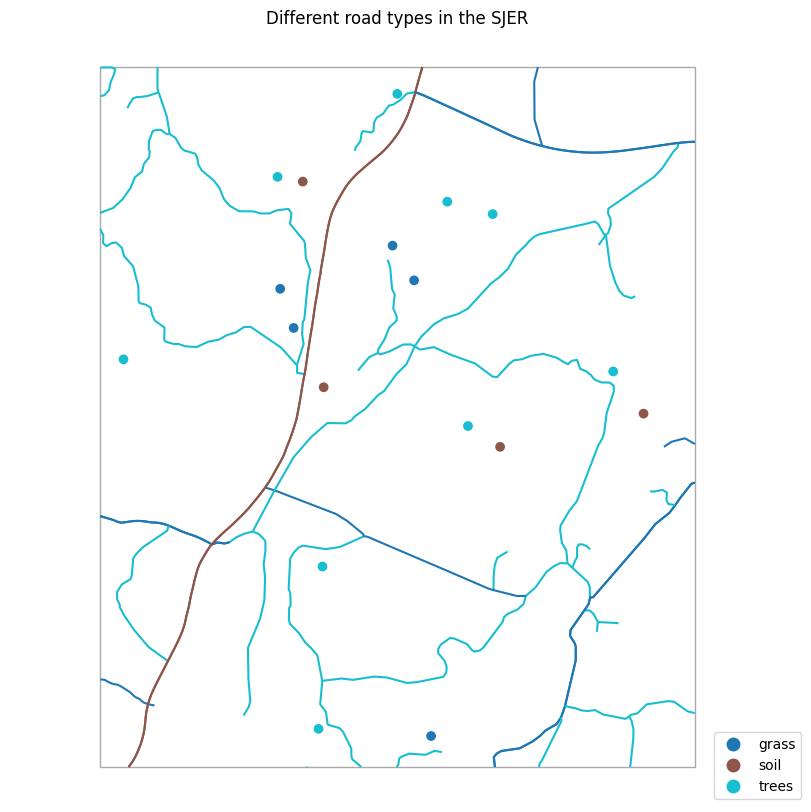

In [7]:
#customizing the plots

#replecing the None for "Unknown" in sjer_roads_cl
sjer_roads_cl['RTTYP'].unique()
sjer_roads_cl["RTTYP"] = sjer_roads_cl["RTTYP"].fillna("Unknown")
print(sjer_roads_cl["RTTYP"].unique())

#new plot
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Different road types in the SJER")
mask_limit.plot(alpha=1,
                color="white",
                edgecolor="darkgray",
                ax=ax)

sjer_roads_cl.plot(ax=ax,
                   column="RTTYP",
                   legend = True,
                   legend_kwds={"loc": "lower left"})

sjer_plots.plot(ax=ax, column = "plot_type",
                legend = True)

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.03,0.1))

ax.set_axis_off()
plt.axis('equal')
plt.show()

## Question

What does the RTTYP road type acronyms **M** and **S** stand for?
Please your answer in the markdown cell BELOW.

HINT: use the `tl_2013_06039_roads.shp.xml` file in your data download to help you figure out the answer to this question
HINT2: you can also find good results using google (on the column name)!

YOUR ANSWER HERE

RTTYP - route type code

M - Common Name

S - State recognized

In [ ]:
# Skip this cell

## Plot 2 - Roads in Del Norte, Modoc & Siskiyou Counties

Create a plot of roads that are located in: Del Norte, Modoc & Siskiyou Counties. To do this, you will need the following layers:

* Counties in California: `california/CA_Counties/CA_Counties_TIGER2016.shp`
* Roads: `global/ne_10m_roads/ne_10m_roads.shp`

To create this plot, you will need to:

1. Select the three counties that you want to work with in the counties dataset. One fast way to do this is using syntax as follows:

`roads_df[roads_df['NAME'].isin(["Siskiyou", "Modoc", "Del Norte"])]`

Name your county boundaries object: `three_counties`.

2. Clip the roads data to the boundary of the counties that you wish to look at.
3. Assign each road segment an attribute that identifies it as within each county.

Color the roads in each county using a unique color.

HINT: use the `legend=True` argument in `.plot()` to create a legend.
Because you are only creating a legend for one layer, you can quickly use `.plot()`
rather than `ax.legend()` which is what you used above!


### IMPORTANT:

* Name your final county boundaries object: `three_counties`.
* Both layers need to the in the SAME coordinate reference system for you to work with them together. REPROJECT both data layers to albers `.to_crs(epsg=5070)`
* Clip the roads to the boundary of the three_counties layer that you created which only contains the 3 selected counties: `"Siskiyou", "Modoc", "Del Norte"`
* To assign each road to its respective county, you will perform a spatial join using `.sjoin()`.
* You will need to redefine the CRS of the roads layer, after the clip, which you can do using something like:

```county_roads.crs = ca_cty_albers.crs```

**NOTE:** you can ignore the warning from pyproj: `'+init=<authority>:<code>' syntax is deprecated.`, which will be resolved by GeoPandas in the next release.

In [8]:
# PLOT 2 - Place only the code required to plot your data here
# Additional processing code can go above this code cell

# Important: name your final geodataframe for county boundaries: three_counties

# YOUR CODE HERE
#open the  files countries california
county_roads_CA = gpd.read_file('/content/drive/MyDrive/python_1/spatial-vector-lidar/california/CA_Counties/CA_Counties_TIGER2016.shp')

#open the  file boundaries
roads_df = gpd.read_file('/content/drive/MyDrive/python_1/spatial-vector-lidar/global/ne_10m_roads/ne_10m_roads.shp')


#checking the crs

if (county_roads_CA.crs == roads_df.crs):
  print("Both layers are in the same crs!")
else:
   print("Both layers are not in the same crs!"),
   print('county_roads_CA crs is', county_roads_CA.crs)
   print('roads_df crs is', roads_df.crs)

Both layers are not in the same crs!
county_roads_CA crs is EPSG:3857
roads_df crs is EPSG:4326


In [9]:
#reprojecting both data layers to albers .to_crs(epsg=5070) = NAD83
county_roads_CA_NAD83 = county_roads_CA.to_crs({"init": "epsg:5070"})
roads_df_NAD83 = roads_df.to_crs({"init": "epsg:5070"})
print('county_roads_CA_NAD83 crs is', county_roads_CA_NAD83.crs)
print('roads_df_NAD83 crs is', roads_df_NAD83.crs)

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


county_roads_CA_NAD83 crs is +init=epsg:5070 +type=crs
roads_df_NAD83 crs is +init=epsg:5070 +type=crs


<Axes: >

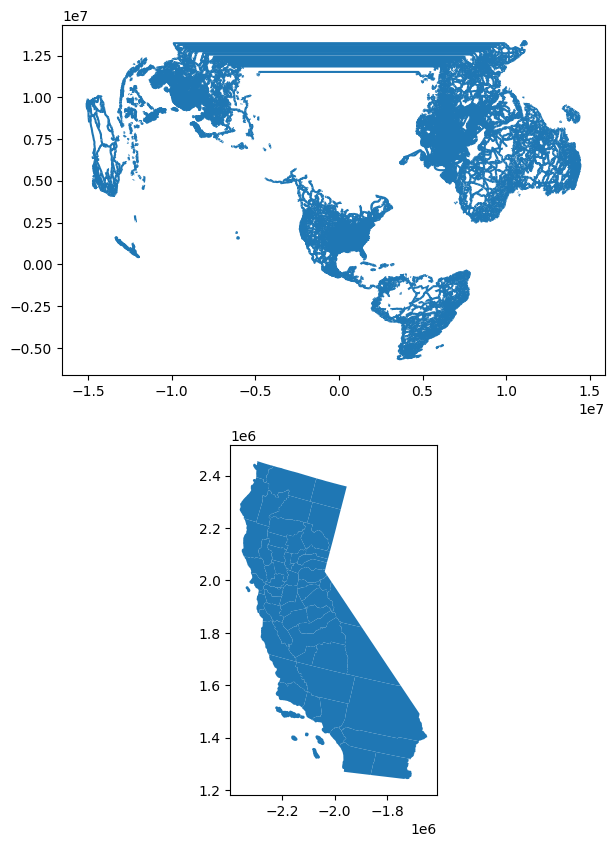

In [10]:
#view the layer's
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
roads_df_NAD83.plot(ax=ax1)
county_roads_CA_NAD83.plot(ax=ax2)

<Axes: >

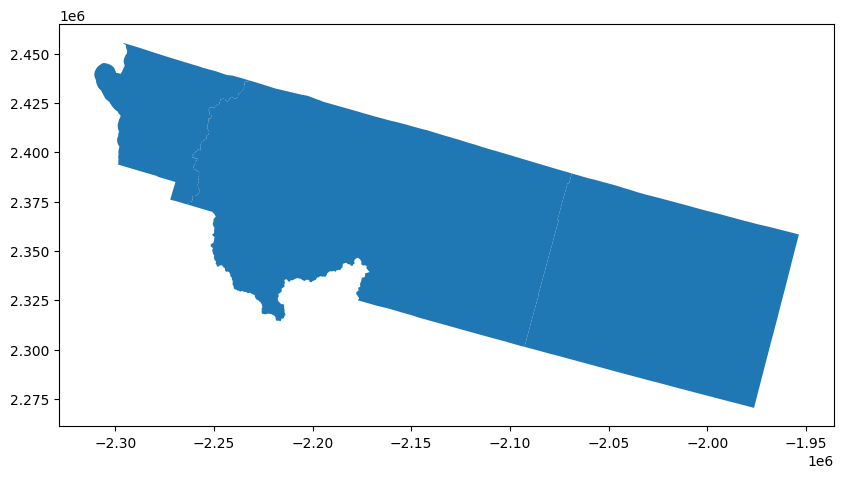

In [11]:
#select the three_counties
county_roads_CA_NAD83['NAME'].unique()
three_counties = county_roads_CA_NAD83[county_roads_CA_NAD83['NAME'].isin(["Siskiyou", "Modoc", "Del Norte"])]
three_counties['NAME'].unique()

#view the layer three_counties
fig, ax = plt.subplots(figsize = (10,10))
three_counties.plot(ax=ax)

<Axes: >

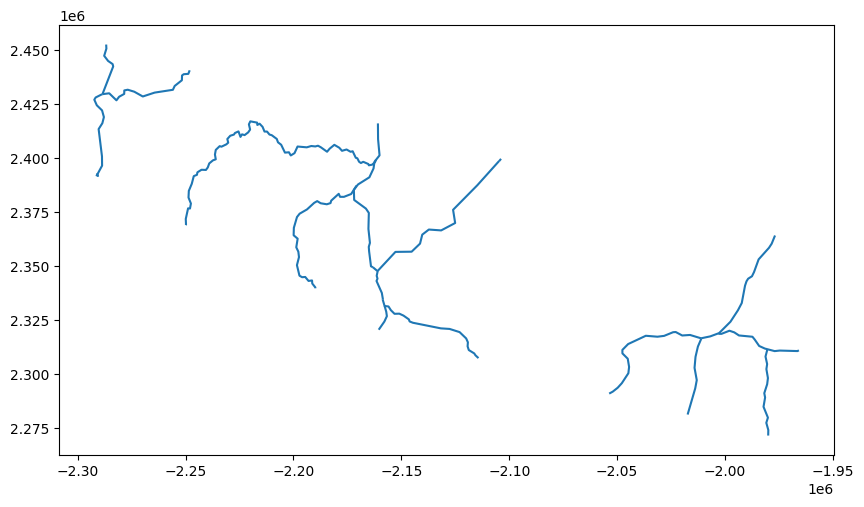

In [12]:
#Clip the roads to the boundary of the three_counties layer
roads_df_NAD83_clip = gpd.clip(roads_df_NAD83,
                         three_counties)
~roads_df_NAD83_clip.is_empty
#Ignore missing/empty geometries
roads_df_NAD83_clip = roads_df_NAD83_clip[~roads_df_NAD83_clip.is_empty]

#view the layer after clip
fig, ax = plt.subplots(figsize = (10,10))
roads_df_NAD83_clip.plot(ax=ax)

In [15]:
#join the layers roads_df_NAD83_clip and three_counties

roads_three_countries = gpd.sjoin(roads_df_NAD83_clip,
                         three_counties,
                         how = "left",
                         op = "intersects")
# Rename the 'NAME' column to 'County'
roads_three_countries = roads_three_countries.rename(columns={"NAME": "County"})
#view the layer after join
roads_three_countries.head(2)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,...,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
1135,6,Road,Secondary Highway,USA,NaN,"Version 1.5: Changed alignment, a few adds in ...",395,NaN,NaN,NaN,...,H1,G4020,NaN,NaN,NaN,A,10140955630,745425201,+41.5929185,-120.7183704
49044,7,Road,Secondary Highway,USA,NaN,New in version 2.0.0,89,NaN,NaN,NaN,...,H1,G4020,NaN,NaN,NaN,A,16261974847,179108278,+41.5879861,-122.5332868


Text(0.5, 1.0, 'Roads in Del Norte, Modoc & Siskiyou Counties')

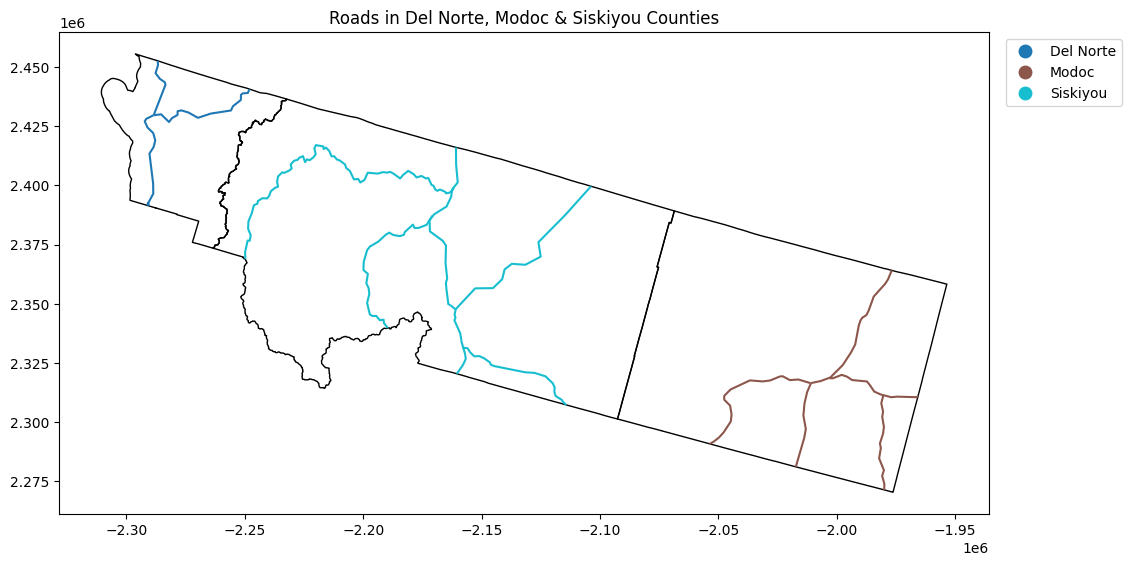

In [16]:
#ploting the final map
fig, ax = plt.subplots(figsize=(12, 8))
three_counties.plot(ax=ax,
                    facecolor = "none",
                    edgecolor = "black")
roads_three_countries.plot(ax=ax,
                           column="County",
                           legend=True)

# Adjust legend location and title
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,1))
ax.set_title("Roads in Del Norte, Modoc & Siskiyou Counties")

## Table 1 - Calculate Total Length of Road Siskiyou, Modoc, Del Norte County in California

Create a geodataframe that shows the total length of road in these counties used in plot 2: Siskiyou, Modoc, and Del Norte. To calculate this, use the data you created for plot 2.

To calculate length of each line in your geodataframe, you can use the syntax `gdf.length`. Create a new column using the syntax:

`gdf["length"] = gdf.length`

You can summarize the data to calculate total length using pandas `.groupby()` on the county column name.

Note: you can use: `pd.options.display.float_format = '{:.4f}'.format` if you'd like to turn off scientific notation for your outputs.

IMPORTANT: Name your final summary GeoDataframe: `cali_roads_summary`.

it should look something like this:


||length|
|----|----|
|NAME||
|Del Norte| road length here|
|Modoc| road length here|
|Siskiyou| road length here|


In [26]:
# TABLE 1 - Place the code required to create the dataframe
# Important: name your final geodataframe: cali_roads_summary

# YOUR CODE HERE
#caalculate length
roads_three_countries["length"] = roads_three_countries.length
# group by county and calculate total length for each roads
cali_roads_summary = roads_three_countries.groupby("County").agg({"length": "sum"})
# format the output to display the total length in miles
pd.options.display.float_format = '{:.4f}'.format
cali_roads_summary["length"] = cali_roads_summary["length"] / 1609.344
#rename the colunm length
cali_roads_summary = cali_roads_summary.rename(columns={"length": "Total Length (in miles)"})
#view
cali_roads_summary.head()

,Total Length (in miles)
County,
Del Norte,75.3770
Modoc,152.2542
Siskiyou,293.5532


## Plot 3 - Global Total Estimated Population and Mean Population Rank

Create a plot of quantile maps of global estimated population by region. To do this, you will use the following layers:

1. Download the natural earth data from the following URL:
`https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip`

The URL below might look odd as it has two "http" strings in it, but it is how the url's are organized on natural earth and should work.

Recall that using `et.data.get_data(url=url)` will download the data to the following directory: `earth-analytics/data/earthpy-downloads/`

After you have downloaded the data, import the data and
1. subset the data to include the following columns: `["REGION_WB", "CONTINENT", "POP_RANK","POP_EST", 'geometry']`
2. Dissolve the data by region (`REGION_WB`) column and aggregate by `sum` and `mean`.
    * HINT: you can provide the aggfun= argument with a `[list]` of function names in quotes and it will summarize numeric columns using each function.
3. Create a figure with two plots:
    * a. Plot 1 - sum estimated population (`POP_EST`) by region.
    * a. Plot 2 - mean population rank (`POP_RANK`) by region.

**NOTE:** you can ignore the warning from merge: `UserWarning: merging between different levels can give an unintended result`.

In [40]:
# PLOT 3 - Place only the code required to plot your data here
# Additional processing code can go above this code cell
# Important: name your final geodataframe: mean_region_val
# YOUR CODE HERE
#importe the data
population_total = gpd.read_file('/content/drive/MyDrive/python_1/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
column_names = list(population_total.columns)
column_names
#select only the columns "REGION_WB", "CONTINENT", "POP_RANK", "POP_EST" e 'geometry
population_total_selected = population_total[["REGION_WB", "CONTINENT", "POP_RANK","POP_EST", 'geometry']]
population_total_selected
#dissolving and  summarize the columns
mean_region_val = population_total_selected .dissolve(by='REGION_WB', aggfunc=['sum', 'mean'])
mean_region_val

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1780: FutureWarning: ['CONTINENT'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc, **kwargs)


,geometry,"(POP_RANK, sum)","(POP_RANK, mean)","(POP_EST, sum)","(POP_EST, mean)"
REGION_WB,,,,,
Antarctica,"MULTIPOLYGON (((-169.81611 -83.18027, -169.828...",5,2.5000,4520.0000,2260.0000
East Asia & Pacific,"MULTIPOLYGON (((-176.22753 -44.31618, -176.231...",485,9.8980,2340641290.0000,47768189.5918
Europe & Central Asia,"MULTIPOLYGON (((-54.26379 2.14819, -54.31402 2...",770,11.6667,921557009.0000,13962984.9848
Latin America & Caribbean,"MULTIPOLYGON (((-109.34146 -27.15399, -109.351...",513,9.8654,646469582.0000,12432107.3462
Middle East & North Africa,"MULTIPOLYGON (((33.71726 21.73095, 33.55844 21...",296,12.8696,457310657.0000,19883072.0435
North America,"MULTIPOLYGON (((-160.08525 21.89354, -160.1025...",45,11.2500,365898700.0000,91474675.0000
South Asia,"MULTIPOLYGON (((72.93702 0.49364, 72.94093 0.4...",124,13.7778,1835782742.0000,203975860.2222
Sub-Saharan Africa,"MULTIPOLYGON (((-12.19571 -37.09857, -12.20031...",675,12.7358,1109395222.3000,20931985.3264


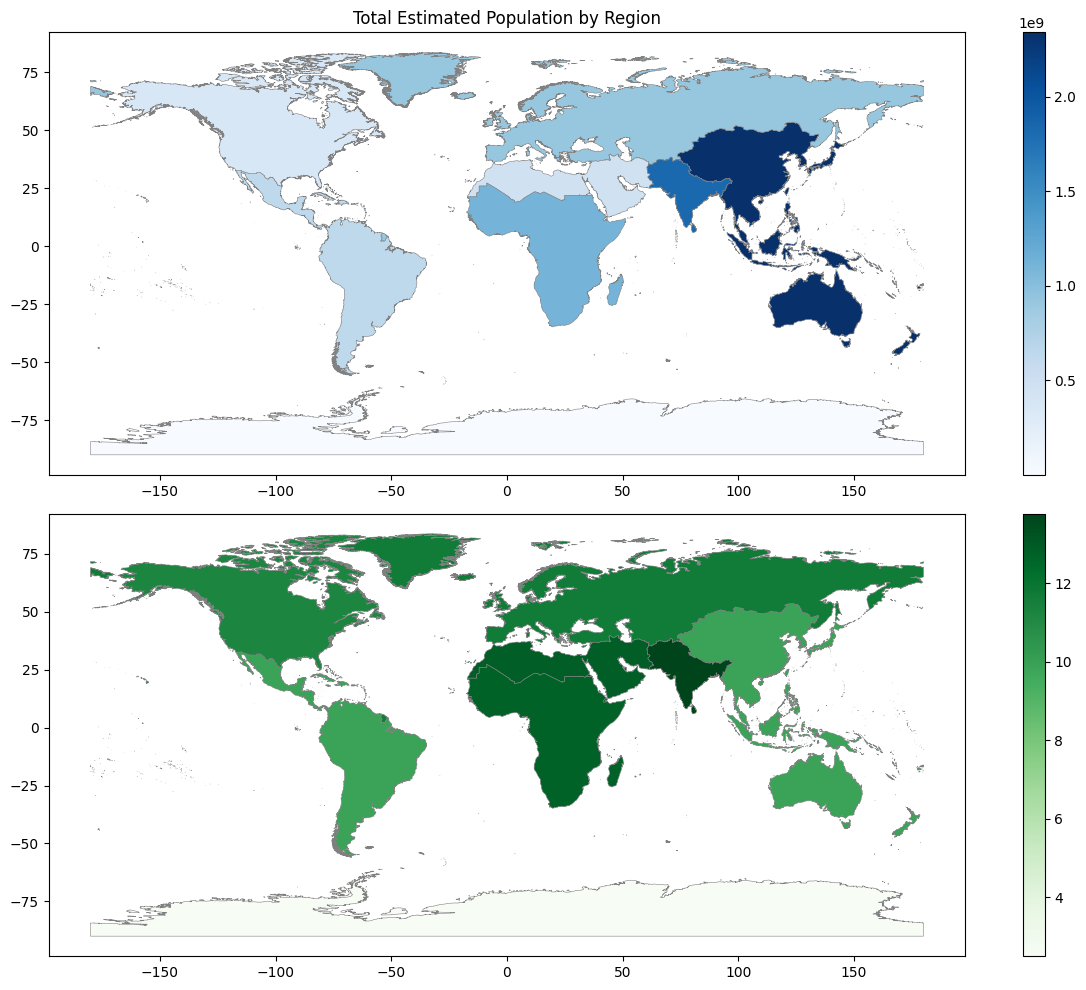

In [49]:
## plot the datas
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,10))

# Plot the sum estimated population by region
mean_region_val.plot(column=('POP_EST', 'sum'),
                         cmap='Blues',
                         linewidth=0.4,
                         ax=ax1,
                         edgecolor='gray',
                         legend=True)
ax1.set_title('Total Estimated Population by Region')

# Plot the mean population rank by region
mean_region_val.plot(column=('POP_RANK', 'mean'),
                         cmap='Greens',
                         linewidth=0.4,
                         ax=ax2,
                         edgecolor='gray',
                         legend=True)
plt.tight_layout()
plt.show()